<a href="https://colab.research.google.com/github/nahid2553/AI-LAB21/blob/main/DM_Lab_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount drive

In [ ]:
 from google.colab import drive 
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
train=pd.read_csv('gdrive/My Drive/train.csv')

show data

In [ ]:
train.head(5)

,job,Business,Age,Study Hours College,Study Hours University,Social And Gaming College,Social And Gaming University,sports on field,Drug Addiction,relationship,financial problem,co curri
0,0,0,23,3,2,0,1,1,0,0,0,1
1,0,1,22,2,1,1,6,0,0,0,0,0
2,1,0,27,4,5,0,2,1,0,0,0,1
3,0,0,23,3,1,1,4,1,0,1,0,0
4,0,0,21,3,1,1,3,1,0,0,1,0


Show the shape of Data

In [ ]:
train.shape
(23, 13)

(23, 13)

missing value search

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   job                           295 non-null    int64
 1   Business                      295 non-null    int64
 2   Age                           295 non-null    int64
 3   Study Hours College           295 non-null    int64
 4   Study Hours University        295 non-null    int64
 5   Social And Gaming College     295 non-null    int64
 6   Social And Gaming University  295 non-null    int64
 7   sports on field               295 non-null    int64
 8   Drug Addiction                295 non-null    int64
 9   relationship                  295 non-null    int64
 10  financial problem             295 non-null    int64
 11  co curri                      295 non-null    int64
dtypes: int64(12)
memory usage: 27.8 KB


Data visualization

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

Function to see the graph

In [ ]:
def bar_chart(feature):
  job=train[train['job']==1][feature].value_counts()
  jobless=train[train['job']==0][feature].value_counts()
  df=pd.DataFrame([job,jobless])
  df.index=['job','jobless']
  df.plot(kind='bar',stacked=True,figsize=(10,5))

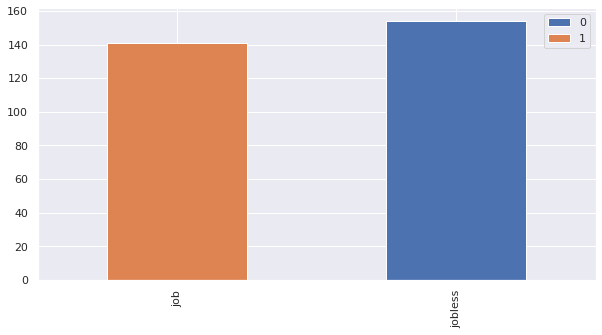

In [ ]:
bar_chart('job')

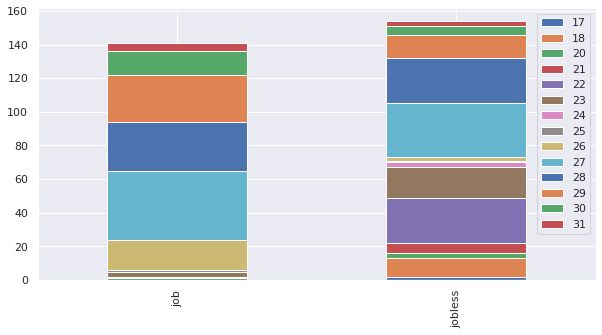

In [ ]:
bar_chart('Age')

In [ ]:
train.head(5)

,job,Business,Age,Study Hours College,Study Hours University,Social And Gaming College,Social And Gaming University,sports on field,Drug Addiction,relationship,financial problem,co curri
0,0,0,23,3,2,0,1,1,0,0,0,1
1,0,1,22,2,1,1,6,0,0,0,0,0
2,1,0,27,4,5,0,2,1,0,0,0,1
3,0,0,23,3,1,1,4,1,0,1,0,0
4,0,0,21,3,1,1,3,1,0,0,1,0


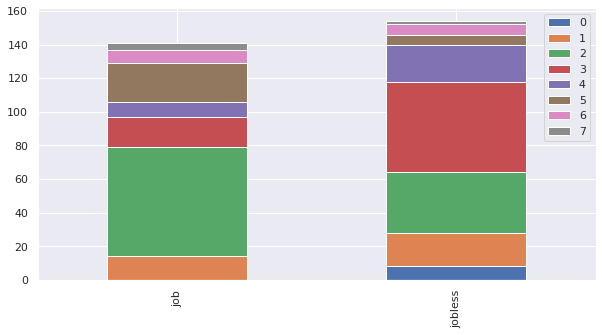

In [ ]:
bar_chart('Social And Gaming University')

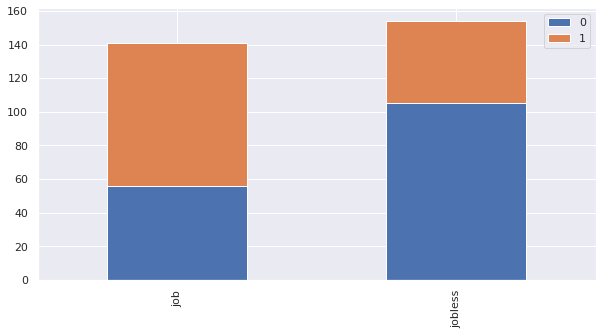

In [ ]:
bar_chart('co curri')

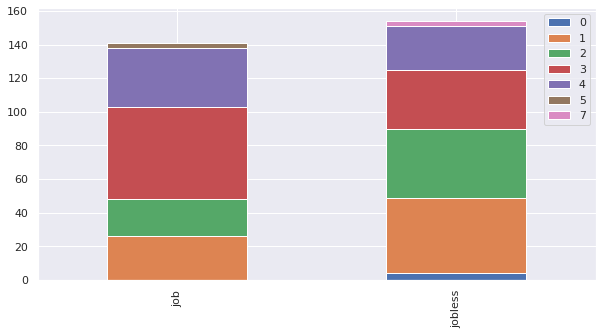

In [ ]:
bar_chart('Study Hours University')

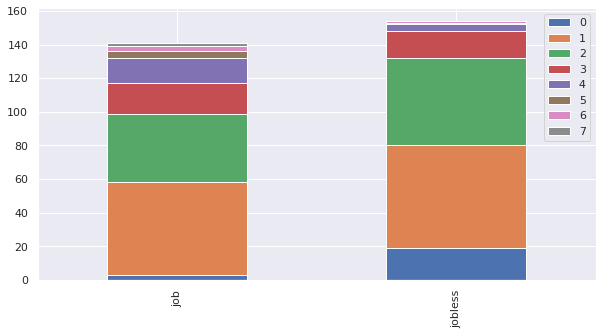

In [ ]:
bar_chart('Social And Gaming College')

In [ ]:
train.isnull().sum()


job                             0
Business                        0
Age                             0
Study Hours College             0
Study Hours University          0
Social And Gaming College       0
Social And Gaming University    0
sports on field                 0
Drug Addiction                  0
relationship                    0
financial problem               0
co curri                        0
dtype: int64

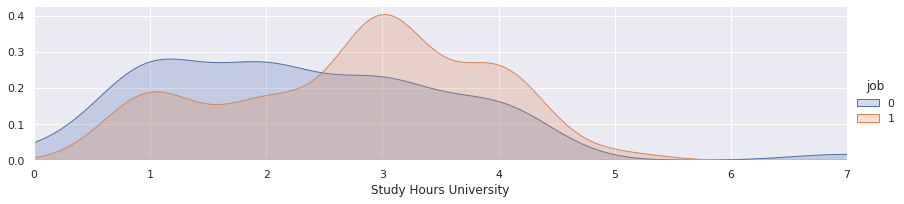

In [ ]:
facet = sns.FacetGrid(train, hue="job",aspect=4)
facet.map(sns.kdeplot,'Study Hours University',shade= True)
facet.set(xlim=(0, train['Study Hours University'].max()))
facet.add_legend()
plt.show()

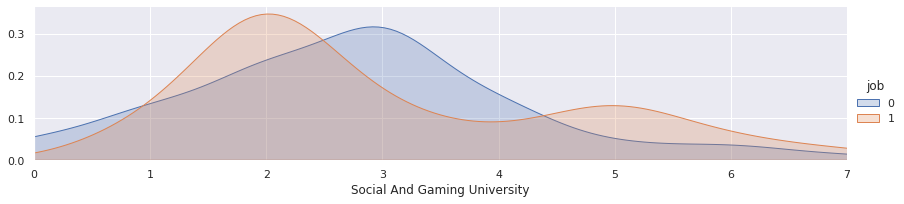

In [ ]:
facet = sns.FacetGrid(train, hue="job",aspect=4)
facet.map(sns.kdeplot,'Social And Gaming University',shade= True)
facet.set(xlim=(0, train['Social And Gaming University'].max()))
facet.add_legend()
plt.show()

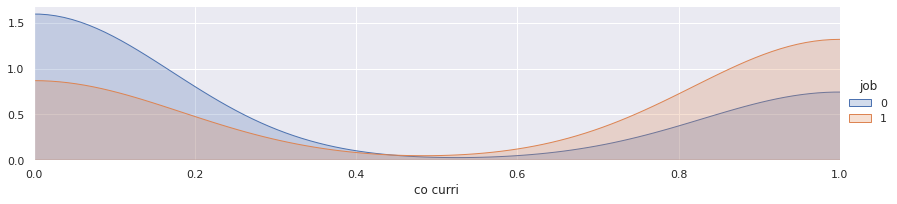

In [ ]:
facet = sns.FacetGrid(train, hue="job",aspect=4)
facet.map(sns.kdeplot,'co curri',shade= True)
facet.set(xlim=(0, train['co curri'].max()))
facet.add_legend()
plt.show()

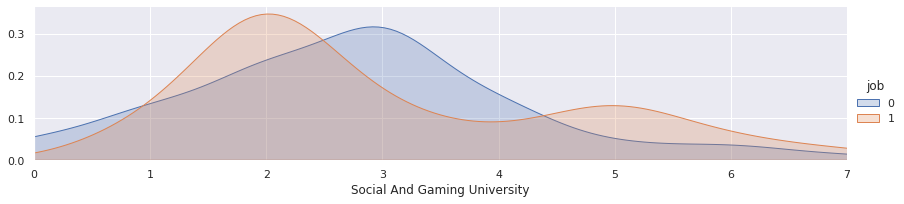

(0.0, 2.0)

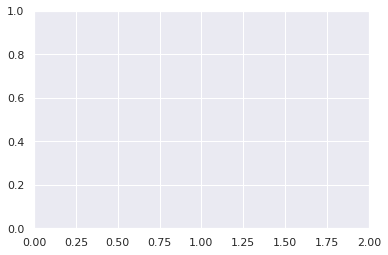

In [ ]:
facet = sns.FacetGrid(train, hue="job",aspect=4)
facet.map(sns.kdeplot,'Social And Gaming University',shade= True)
facet.set(xlim=(0, train['Social And Gaming University'].max()))
facet.add_legend()
plt.show()
plt.xlim(0 , 2)


divide dataset

In [ ]:
train_data = train.drop('Study Hours University', axis=1)     
target = train['job']

train_data.shape, target.shape

((295, 11), (295,))

In [ ]:
train.head(5)

,job,Business,Age,Study Hours College,Study Hours University,Social And Gaming College,Social And Gaming University,sports on field,Drug Addiction,relationship,financial problem,co curri
0,0,0,23,3,2,0,1,1,0,0,0,1
1,0,1,22,2,1,1,6,0,0,0,0,0
2,1,0,27,4,5,0,2,1,0,0,0,1
3,0,0,23,3,1,1,4,1,0,1,0,0
4,0,0,21,3,1,1,3,1,0,0,1,0


Splitting the dataset into train and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=.30, random_state=42)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)
print(y_test)

y_test.value_counts()

X_train:  (206, 11)
X_test:  (89, 11)
y_train:  (206,)
y_test:  (89,)
273    1
155    1
84     1
82     0
261    0
      ..
292    0
139    1
266    1
67     0
90     1
Name: job, Length: 89, dtype: int64


0    51
1    38
Name: job, dtype: int64

Train the dataset

In [ ]:
 
from sklearn.ensemble import RandomForestClassifier
 
dt = RandomForestClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[51  0]
 [ 0 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        38

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
 
 
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[51  0]
 [ 0 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        38

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, metrics

iris = datasets.load_iris()
classifier = GaussianNB()
classifier.fit(iris.data, iris.target)
score = metrics.accuracy_score(iris.target, classifier.predict(iris.data))
print("Accuracy: %f" % score)

Accuracy: 0.960000


In [ ]:
train.head(10)

,job,Business,Age,Study Hours College,Study Hours University,Social And Gaming College,Social And Gaming University,sports on field,Drug Addiction,relationship,financial problem,co curri
0,0,0,23,3,2,0,1,1,0,0,0,1
1,0,1,22,2,1,1,6,0,0,0,0,0
2,1,0,27,4,5,0,2,1,0,0,0,1
3,0,0,23,3,1,1,4,1,0,1,0,0
4,0,0,21,3,1,1,3,1,0,0,1,0
5,1,0,23,3,1,1,4,0,0,0,1,0
6,0,1,24,4,1,1,4,1,0,1,0,1
7,1,0,27,5,3,1,1,0,0,1,0,1
8,0,0,22,4,1,0,4,1,0,1,1,0
9,0,0,22,3,1,3,4,2,0,0,0,1
